<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-07-31 21:46:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: 'survey-data.csv'

     0K .......... .......... .......... .......... ..........  0% 1.74M 87s
    50K .......... .......... .......... .......... ..........  0% 2.54M 73s
   100K .......... .......... .......... .......... ..........  0% 4.79M 60s
   150K .......... .......... .......... .......... ..........  0% 3.93M 54s
   200K .......... .......... .......... .......... ..........  0%  104M 44s
   250K .......... .......... .......... .......... ...

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


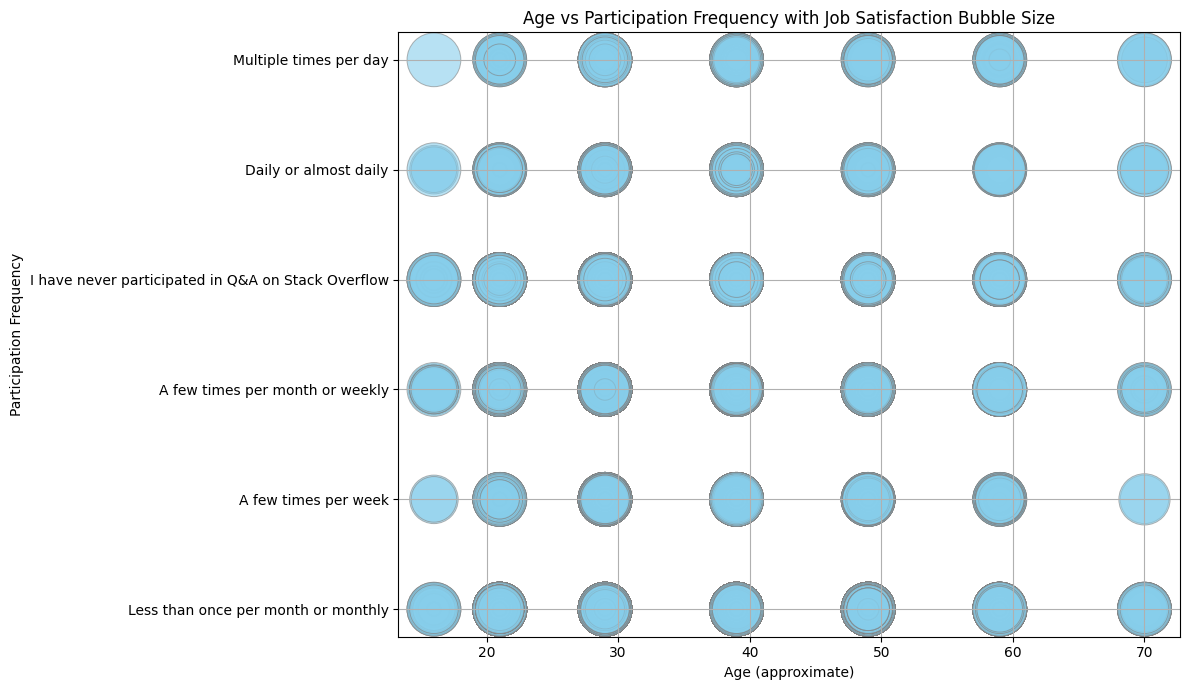

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df has 'Age', 'SOPartFreq', 'JobSat'
df_clean = df[['Age', 'SOPartFreq', 'JobSat']].dropna()

# Map age categories to numeric
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_clean['AgeNumeric'] = df_clean['Age'].map(age_map)
df_clean = df_clean.dropna(subset=['AgeNumeric'])

# Normalize JobSat for better bubble size scaling
# Make sure JobSat is numeric (e.g., 1 to 5)
min_size = 100
max_size = 1500
df_clean['BubbleSize'] = (
    (df_clean['JobSat'] - df_clean['JobSat'].min()) /
    (df_clean['JobSat'].max() - df_clean['JobSat'].min())
) * (max_size - min_size) + min_size

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(
    x=df_clean['AgeNumeric'],
    y=df_clean['SOPartFreq'],
    s=df_clean['BubbleSize'],
    alpha=0.6,
    c='skyblue',
    edgecolors='grey',
    linewidth=0.7
)
plt.title('Age vs Participation Frequency with Job Satisfaction Bubble Size')
plt.xlabel('Age (approximate)')
plt.ylabel('Participation Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


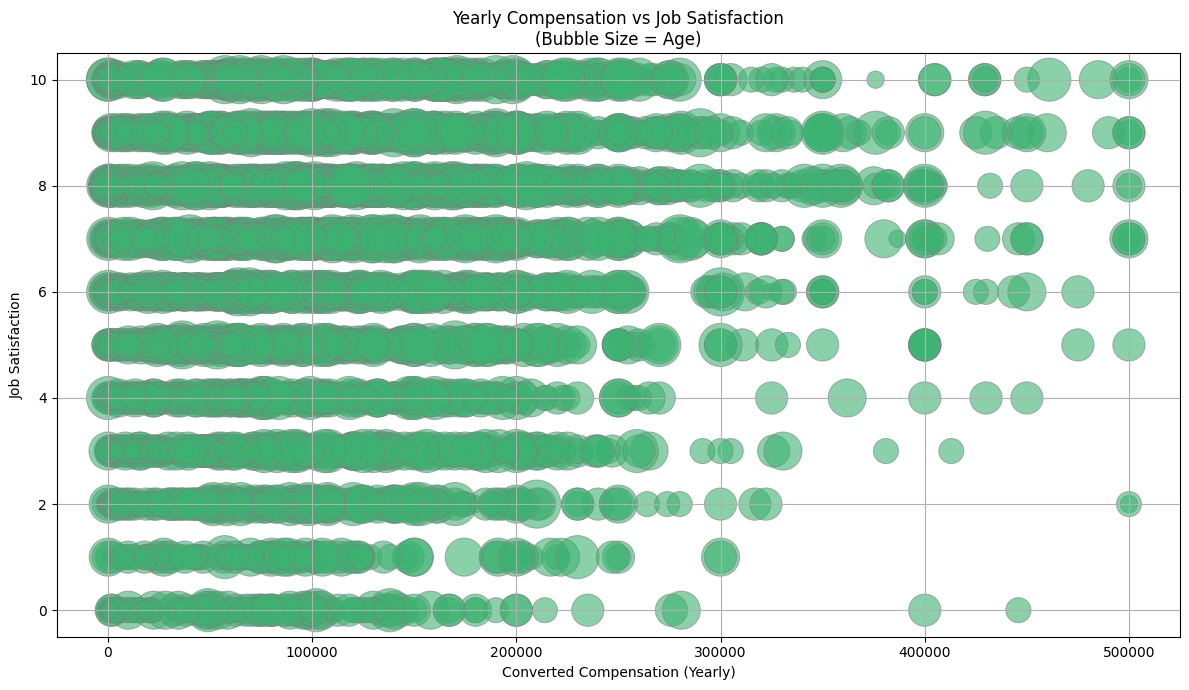

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df has 'ConvertedCompYearly', 'JobSat', 'Age'
df_clean = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()

# Map age categories to numeric
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df_clean['AgeNumeric'] = df_clean['Age'].map(age_map)
df_clean = df_clean.dropna(subset=['AgeNumeric'])

# Scale age to use for bubble size
min_size = 50
max_size = 1200
df_clean['BubbleSize'] = (
    (df_clean['AgeNumeric'] - df_clean['AgeNumeric'].min()) /
    (df_clean['AgeNumeric'].max() - df_clean['AgeNumeric'].min())
) * (max_size - min_size) + min_size

# Optional: Filter out extreme compensation values (e.g., > $500,000)
df_clean = df_clean[df_clean['ConvertedCompYearly'] <= 500000]

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(
    x=df_clean['ConvertedCompYearly'],
    y=df_clean['JobSat'],
    s=df_clean['BubbleSize'],
    alpha=0.6,
    c='mediumseagreen',
    edgecolors='grey',
    linewidth=0.7
)
plt.title('Yearly Compensation vs Job Satisfaction\n(Bubble Size = Age)')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



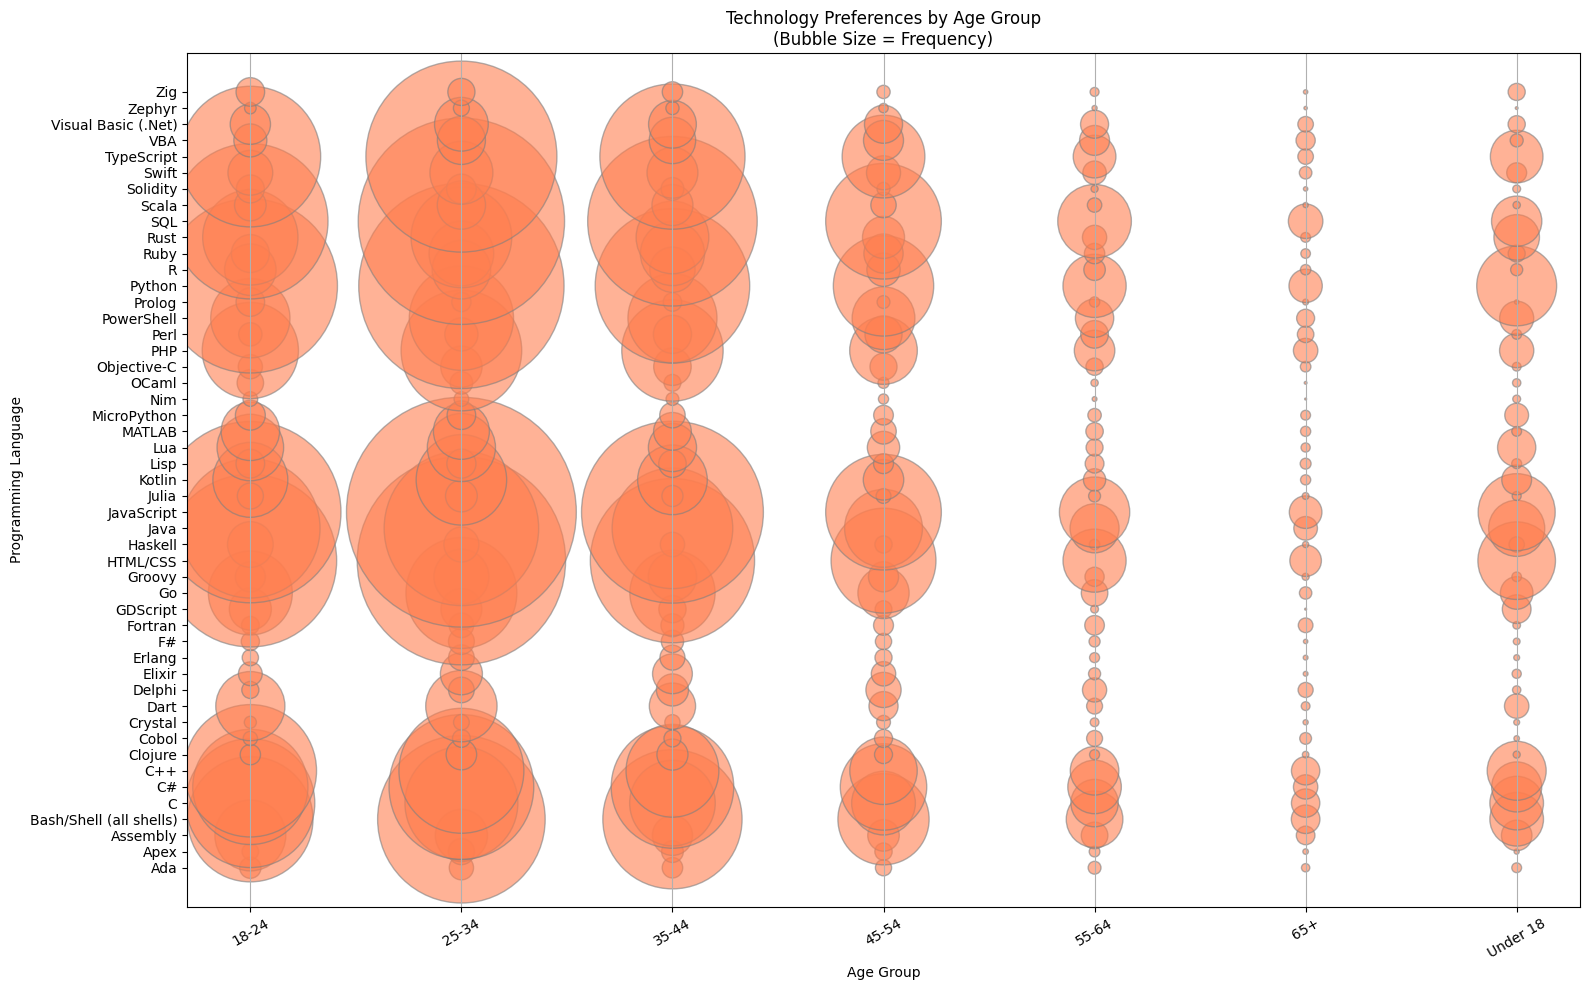

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean the data
df_lang = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Step 2: Map Age to numeric or keep categories
age_map = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': None
}
df_lang['AgeGroup'] = df_lang['Age'].map(age_map)
df_lang = df_lang.dropna(subset=['AgeGroup'])

# Step 3: Explode multiple languages per row
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang.explode('LanguageHaveWorkedWith')

# Step 4: Group and count
lang_age_counts = df_exploded.groupby(['AgeGroup', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Step 5: Bubble plot
plt.figure(figsize=(16, 10))
scatter = plt.scatter(
    x=lang_age_counts['AgeGroup'],
    y=lang_age_counts['LanguageHaveWorkedWith'],
    s=lang_age_counts['Frequency'] * 2,  # Adjust size multiplier as needed
    alpha=0.6,
    edgecolors='grey',
    c='coral'
)

plt.title('Technology Preferences by Age Group\n(Bubble Size = Frequency)')
plt.xlabel('Age Group')
plt.ylabel('Programming Language')
plt.grid(True, axis='x')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


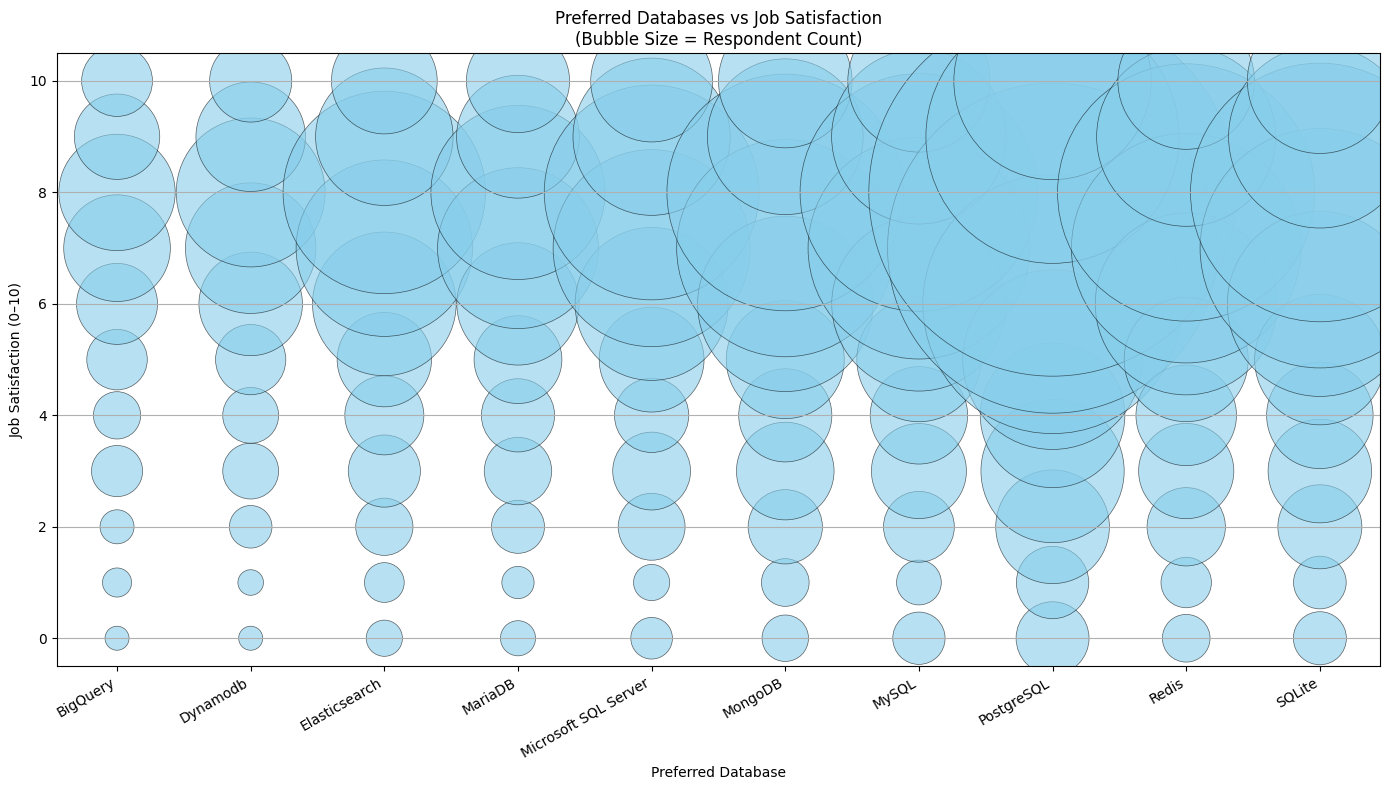

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter rows with required values
df_db = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# ✅ No mapping needed — JobSat is already numeric
df_db['DatabaseWantToWorkWith'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df_db.explode('DatabaseWantToWorkWith')

# Clean whitespace
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()

# Group and count combinations
db_job_counts = (
    df_exploded.groupby(['DatabaseWantToWorkWith', 'JobSat'])
    .size()
    .reset_index(name='Frequency')
)

# Optional: Filter to top 10 most popular databases
top_dbs = db_job_counts.groupby('DatabaseWantToWorkWith')['Frequency'].sum().nlargest(10).index
db_job_counts = db_job_counts[db_job_counts['DatabaseWantToWorkWith'].isin(top_dbs)]

# ✅ Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=db_job_counts['DatabaseWantToWorkWith'],
    y=db_job_counts['JobSat'],
    s=db_job_counts['Frequency'] * 20,  # Scale bubble size
    alpha=0.6,
    c='skyblue',
    edgecolors='black',
    linewidths=0.5
)

plt.title('Preferred Databases vs Job Satisfaction\n(Bubble Size = Respondent Count)')
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction (0–10)')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


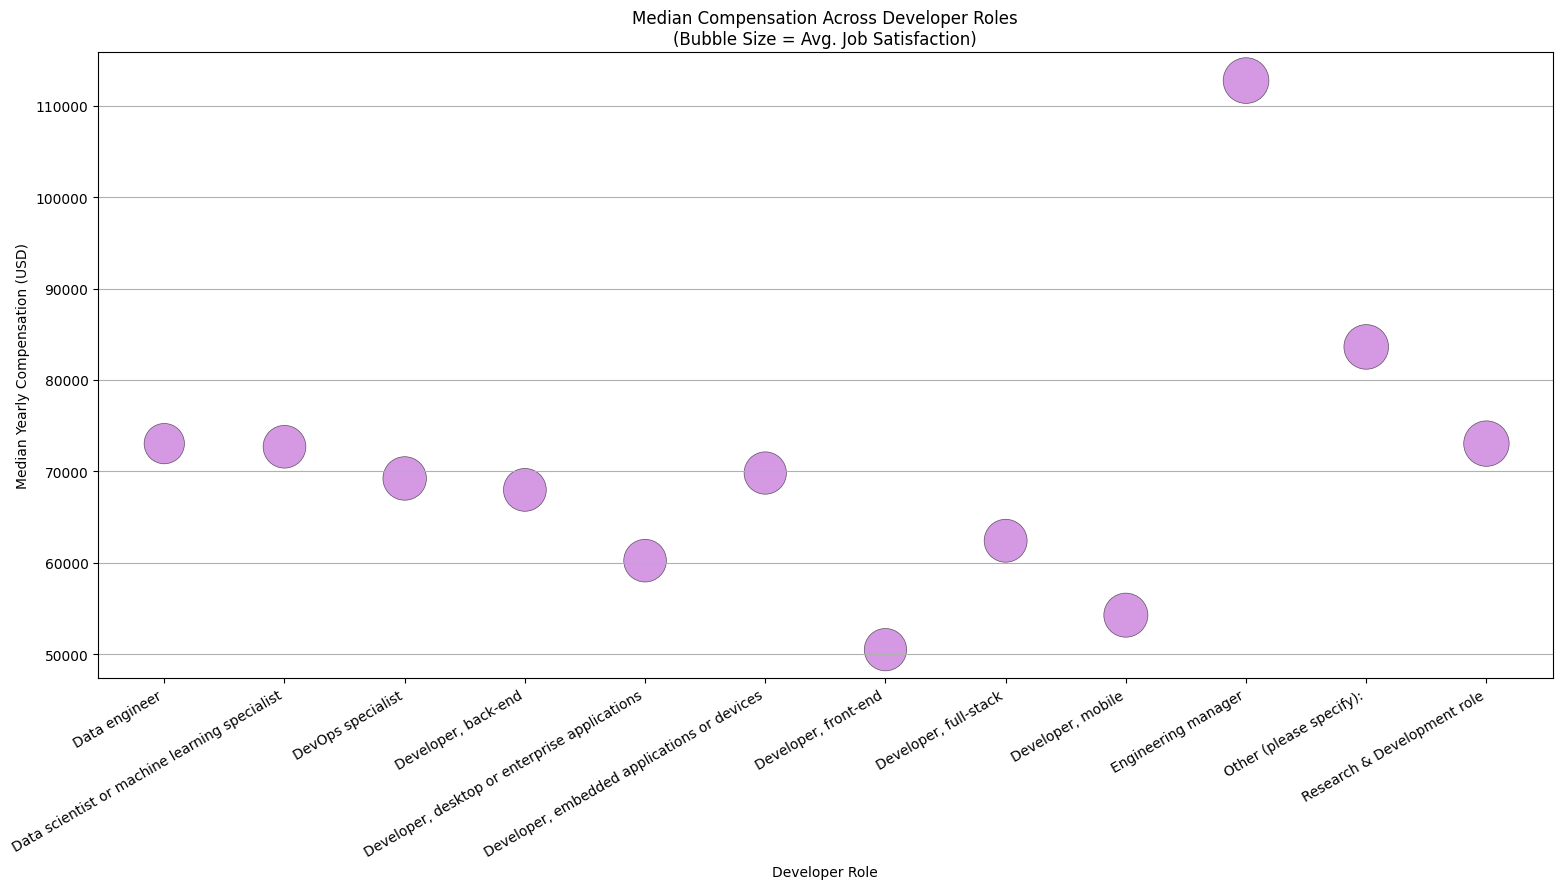

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter relevant columns and drop missing values
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Step 2: Explode multi-role responses (DevType is usually semicolon-separated)
df_roles['DevType'] = df_roles['DevType'].str.split(';')
df_roles = df_roles.explode('DevType')

# Step 3: Clean whitespace and filter for valid compensation
df_roles['DevType'] = df_roles['DevType'].str.strip()
df_roles = df_roles[df_roles['ConvertedCompYearly'] < 500000]  # optional: remove outliers

# Step 4: Aggregate data — average compensation and average job satisfaction per role
agg_data = df_roles.groupby('DevType').agg({
    'ConvertedCompYearly': 'median',  # use median to reduce skew
    'JobSat': 'mean',
    'DevType': 'count'  # total number of responses (used for optional filtering)
}).rename(columns={'DevType': 'RespondentCount'}).reset_index()

# Step 5: Scale JobSat for bubble size
min_size, max_size = 100, 1500
agg_data['BubbleSize'] = (
    (agg_data['JobSat'] - agg_data['JobSat'].min()) /
    (agg_data['JobSat'].max() - agg_data['JobSat'].min())
) * (max_size - min_size) + min_size

# Optional: Limit to top 12 most common roles
top_roles = df_roles['DevType'].value_counts().nlargest(12).index
agg_data = agg_data[agg_data['DevType'].isin(top_roles)]

# Step 6: Plotting
plt.figure(figsize=(16, 9))
plt.scatter(
    x=agg_data['DevType'],
    y=agg_data['ConvertedCompYearly'],
    s=agg_data['BubbleSize'],
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5,
    c='mediumorchid'
)

plt.title('Median Compensation Across Developer Roles\n(Bubble Size = Avg. Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


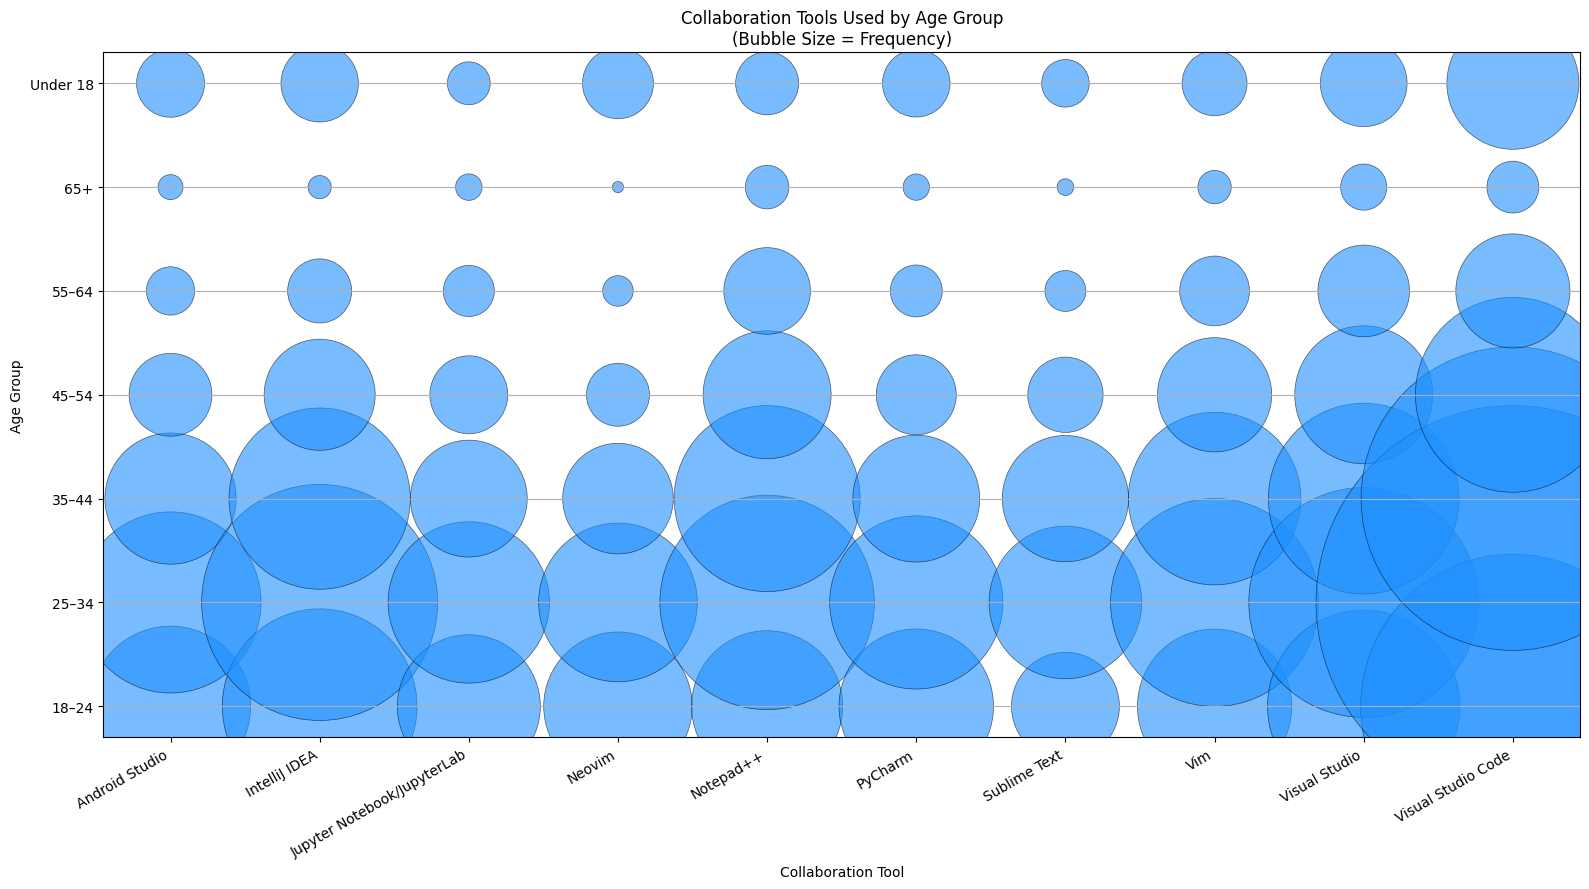

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select and clean data
df_tools = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Step 2: Map Age to readable age groups (if needed)
age_map = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18–24',
    '25-34 years old': '25–34',
    '35-44 years old': '35–44',
    '45-54 years old': '45–54',
    '55-64 years old': '55–64',
    '65 years or older': '65+',
    'Prefer not to say': None
}
df_tools['AgeGroup'] = df_tools['Age'].map(age_map)
df_tools = df_tools.dropna(subset=['AgeGroup'])

# Step 3: Explode collaboration tool list (semicolon-separated)
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools = df_tools.explode('NEWCollabToolsHaveWorkedWith')
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.strip()

# Step 4: Count frequency of each tool per age group
tool_age_counts = (
    df_tools.groupby(['NEWCollabToolsHaveWorkedWith', 'AgeGroup'])
    .size()
    .reset_index(name='Frequency')
)

# Optional: Limit to top 10 tools for clarity
top_tools = tool_age_counts.groupby('NEWCollabToolsHaveWorkedWith')['Frequency'].sum().nlargest(10).index
tool_age_counts = tool_age_counts[tool_age_counts['NEWCollabToolsHaveWorkedWith'].isin(top_tools)]

# Step 5: Plotting
plt.figure(figsize=(16, 9))
plt.scatter(
    x=tool_age_counts['NEWCollabToolsHaveWorkedWith'],
    y=tool_age_counts['AgeGroup'],
    s=tool_age_counts['Frequency'] * 5,  # Scale bubble size
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5,
    c='dodgerblue'
)

plt.title('Collaboration Tools Used by Age Group\n(Bubble Size = Frequency)')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



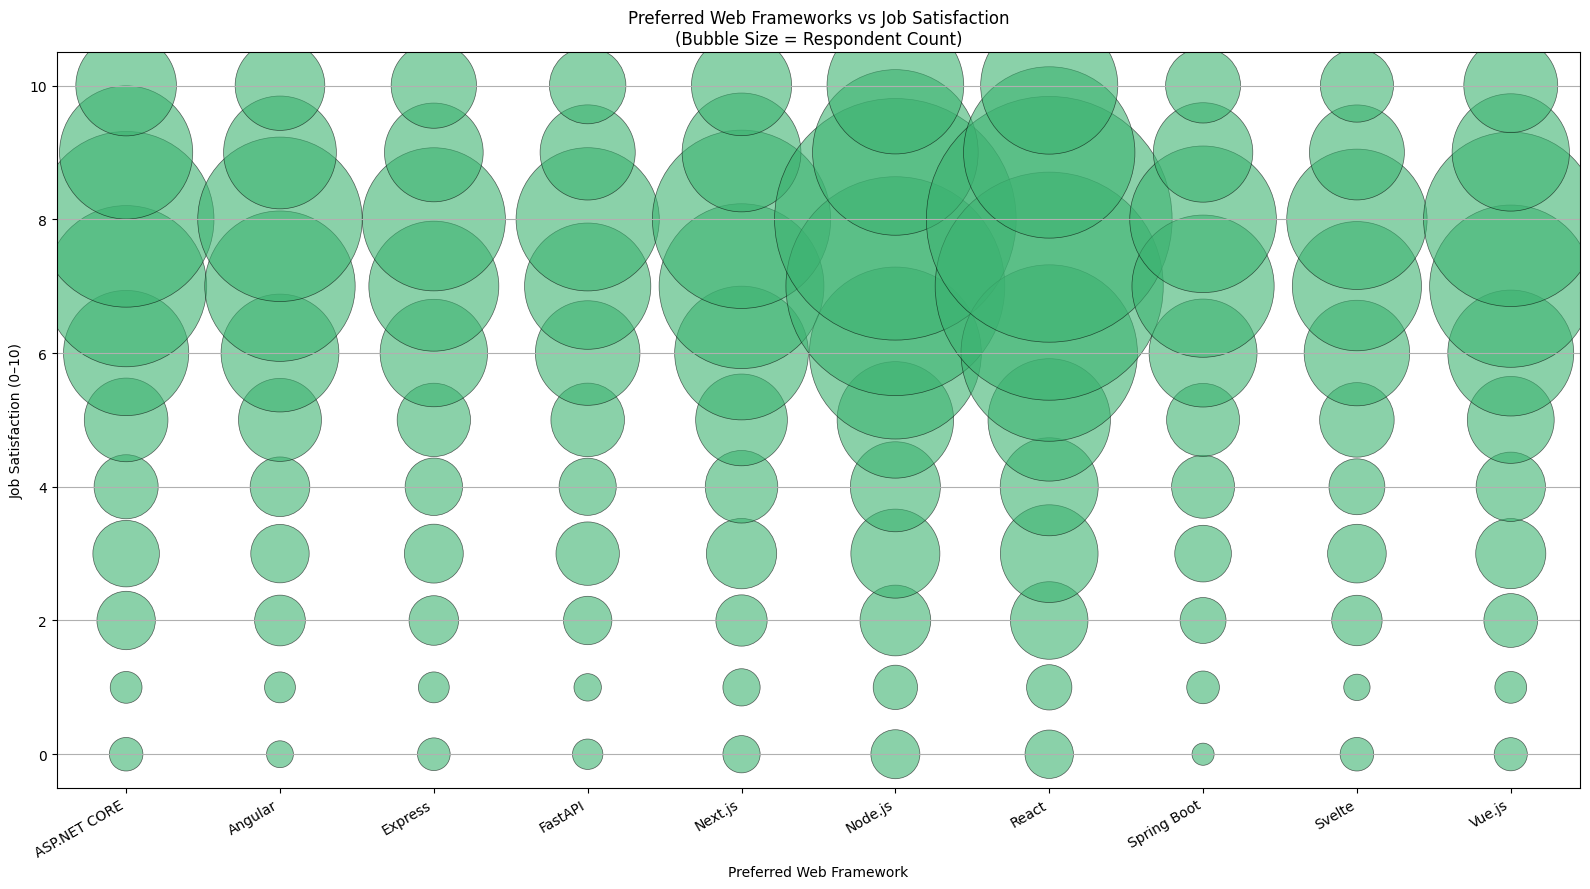

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare relevant columns
df_web = df[['WebframeWantToWorkWith', 'JobSat']].dropna()

# Step 2: Ensure JobSat is numeric (should already be on 0–10 scale)
# If not, map categories to numeric as needed

# Step 3: Explode multi-framework responses (semicolon-separated)
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('WebframeWantToWorkWith')
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].str.strip()

# Step 4: Group by framework and satisfaction score
web_job_counts = (
    df_web.groupby(['WebframeWantToWorkWith', 'JobSat'])
    .size()
    .reset_index(name='Frequency')
)

# Optional: Limit to top 10 frameworks for readability
top_frameworks = web_job_counts.groupby('WebframeWantToWorkWith')['Frequency'].sum().nlargest(10).index
web_job_counts = web_job_counts[web_job_counts['WebframeWantToWorkWith'].isin(top_frameworks)]

# Step 5: Plotting
plt.figure(figsize=(16, 9))
plt.scatter(
    x=web_job_counts['WebframeWantToWorkWith'],
    y=web_job_counts['JobSat'],
    s=web_job_counts['Frequency'] * 15,  # Adjust for visibility
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5,
    c='mediumseagreen'
)

plt.title('Preferred Web Frameworks vs Job Satisfaction\n(Bubble Size = Respondent Count)')
plt.xlabel('Preferred Web Framework')
plt.ylabel('Job Satisfaction (0–10)')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



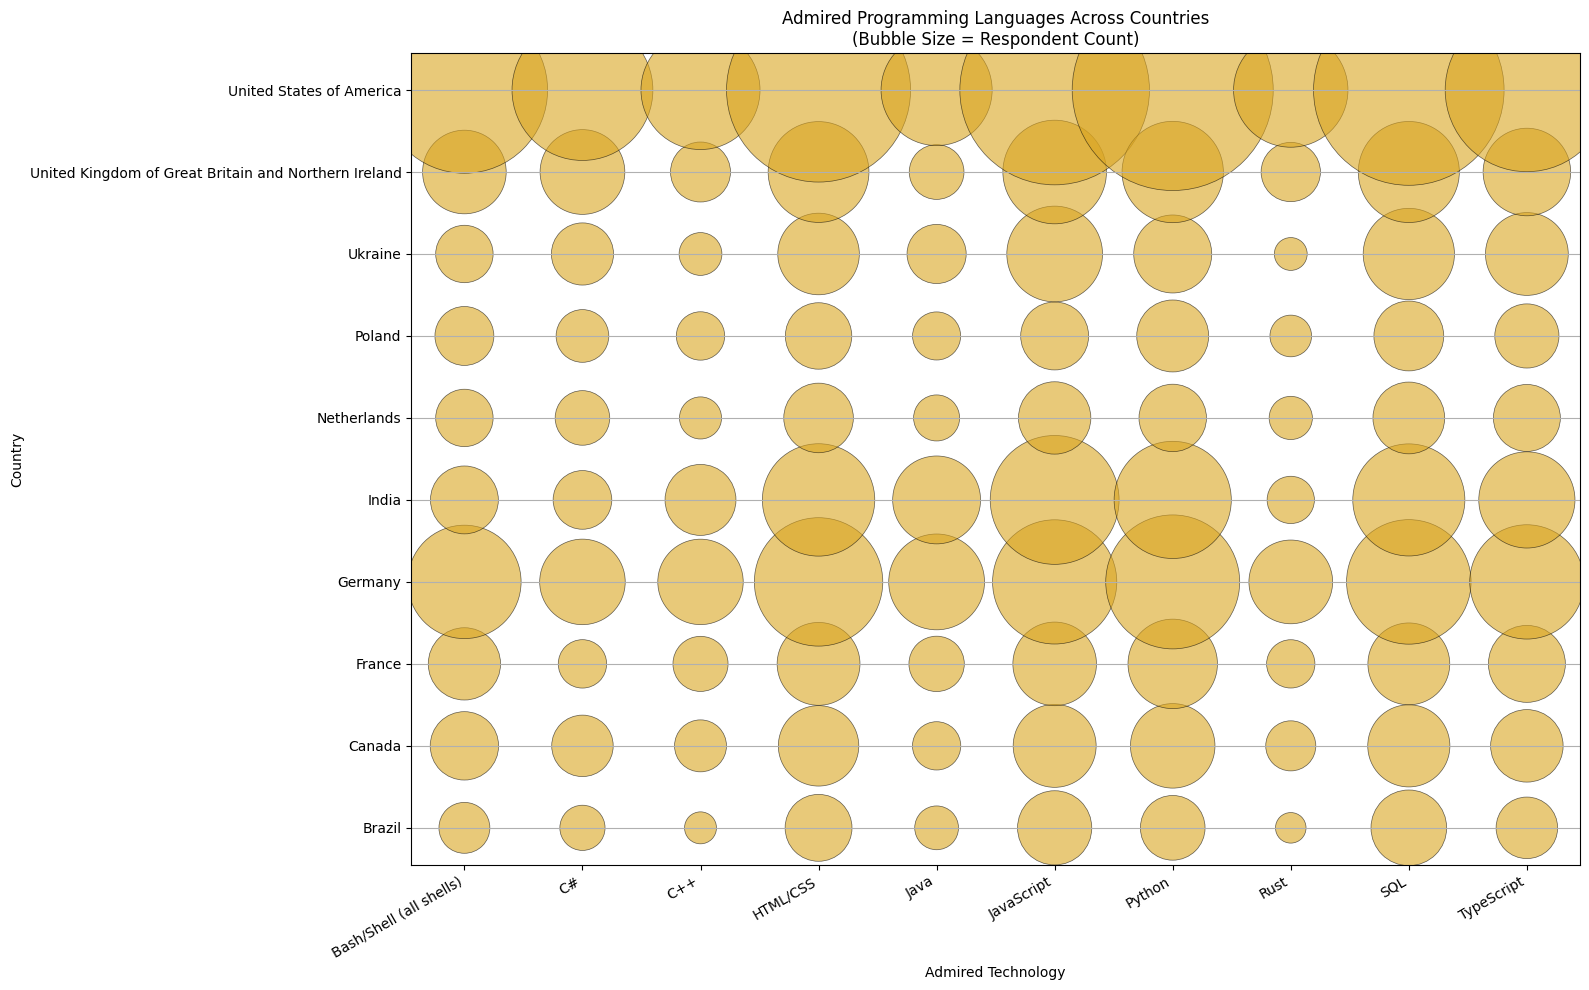

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare data
df_admire = df[['LanguageAdmired', 'Country']].dropna()

# Step 2: Explode multi-language responses (semicolon-separated list)
df_admire['LanguageAdmired'] = df_admire['LanguageAdmired'].str.split(';')
df_admire = df_admire.explode('LanguageAdmired')
df_admire['LanguageAdmired'] = df_admire['LanguageAdmired'].str.strip()

# Step 3: Group and count frequency
admire_counts = (
    df_admire.groupby(['LanguageAdmired', 'Country'])
    .size()
    .reset_index(name='Frequency')
)

# Optional: Filter to top 10 languages and top 10 countries for clarity
top_langs = admire_counts.groupby('LanguageAdmired')['Frequency'].sum().nlargest(10).index
top_countries = admire_counts.groupby('Country')['Frequency'].sum().nlargest(10).index
admire_counts = admire_counts[
    admire_counts['LanguageAdmired'].isin(top_langs) & 
    admire_counts['Country'].isin(top_countries)
]

# Step 4: Plotting
plt.figure(figsize=(16, 10))
plt.scatter(
    x=admire_counts['LanguageAdmired'],
    y=admire_counts['Country'],
    s=admire_counts['Frequency'] * 5,  # Adjust multiplier as needed
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5,
    c='goldenrod'
)

plt.title('Admired Programming Languages Across Countries\n(Bubble Size = Respondent Count)')
plt.xlabel('Admired Technology')
plt.ylabel('Country')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
